In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# variable
f = 100e3
time_interval = 1/f
tau = 0
pc = 0


In [ ]:
# loran-c 300
t = np.linspace(0, 300, 30000)

envelope = (t-tau)**2*np.exp(-2*(t-tau)/65)
normalized_e = (envelope - np.min(envelope))/(np.max(envelope)-np.min(envelope))
s = normalized_e *np.sin(2*np.pi*f*t*1e-6 + pc)

In [ ]:
# Loran-c 300 fft
N = len(s)
k = np.arange(N)
T = N/f
freq = k / T
freq = freq[range(int(N/2))]

s_fft = np.fft.fft(s)
sf = s_fft / N
sf = sf[range(int(N/2))]

sf = abs(sf)
normalized_sf = (sf - np.min(sf)) / (np.max(sf) - np.min(sf))


In [24]:

# loran-c 1000
t_2 = np.linspace(0, 1000, 30000)

envelope_2 = (t_2-tau)**2*np.exp(-2*(t_2-tau)/65)
normalized_e_2 = (envelope - np.min(envelope))/(np.max(envelope)-np.min(envelope))
s_2 = normalized_e_2 *np.sin(2*np.pi*f*t_2*1e-6 + pc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


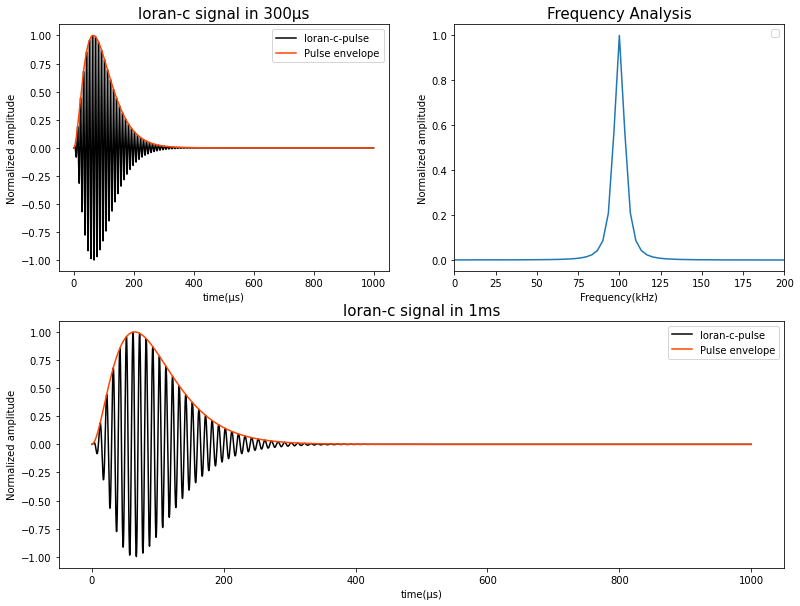

In [27]:
fig = plt.figure(figsize=(13, 10))

ax1 = plt.subplot2grid((2,2), 
                       (0,0), 
                       fig=fig)

ax2 = plt.subplot2grid((2,2), 
                       (0,1), 
                       fig=fig)

ax3 = plt.subplot2grid((2, 2),
                       (1, 0),
                       colspan=2,
                       fig=fig)

ax1.plot(t, s, 'k', label='loran-c-pulse')
ax1.plot(t, normalized_e, 'orangered', label='Pulse envelope')
ax1.set_title("loran-c signal in 300μs", fontsize=15)
ax1.set_ylabel("Normalized amplitude", fontsize=10)
ax1.set_xlabel("time(μs)", fontsize=10)
ax1.legend()

ax2.plot(freq[:200], abs(normalized_sf[:200]))
ax2.set_xlim(0, 200)
ax2.set_title("Frequency Analysis", fontsize=15)
ax2.set_ylabel("Normalized amplitude", fontsize=10)
ax2.set_xlabel("Frequency(kHz)", fontsize=10)
ax2.legend()

ax3.plot(t_2, s_2, 'k', label='loran-c-pulse')
ax3.plot(t_2, normalized_e_2, 'orangered', label='Pulse envelope')
ax3.set_title('loran-c signal in 1ms', fontsize=15)
ax3.set_ylabel("Normalized amplitude", fontsize=10)
ax3.set_xlabel("time(μs)", fontsize=10)
ax3.legend()

plt.show()

#### master window / slave window
`master_window()`에서는 master의 reference signal을 생성한다. tau값을 증가시키면서 총 10ms(10,000μs)의 reference signal을 생성한다.
생성을 완료한 후에는 현재는 생성된 신호를 ploting하고, reference signal을 return 함.

In [30]:
def gen_master_window():
    
    freq = 100e3
    tau = 0
    master_window = np.array([])
    master_window_e = np.array([])
    timespace = np.array([])

    for i in range(0, 10):
        
        tau = tau + 1000*i
        t = np.linspace(tau, tau+1000, 30000)
        
        if i == 8:
            normalized_e = np.zeros(shape=(30000, ))
            s = np.zeros(shape=(30000, ))
        
        else:
            envelope = (t-tau)**2*np.exp(-2*(t-tau)/65)
            normalized_e = (envelope - np.min(envelope))/(np.max(envelope)-np.min(envelope))
            s = normalized_e *np.sin(2*np.pi*f*t*1e-6 + pc)
        
        timespace = np.append(timespace[:-1], t)
        master_window = np.append(master_window[:-1], s)
        master_window_e = np.append(master_window_e[:-1], normalized_e)
        
    return timespace, master_window, master_window_e
        

In [31]:
timespace, master_window, master_window_e = gen_master_window()

In [32]:
len(timespace)

299991

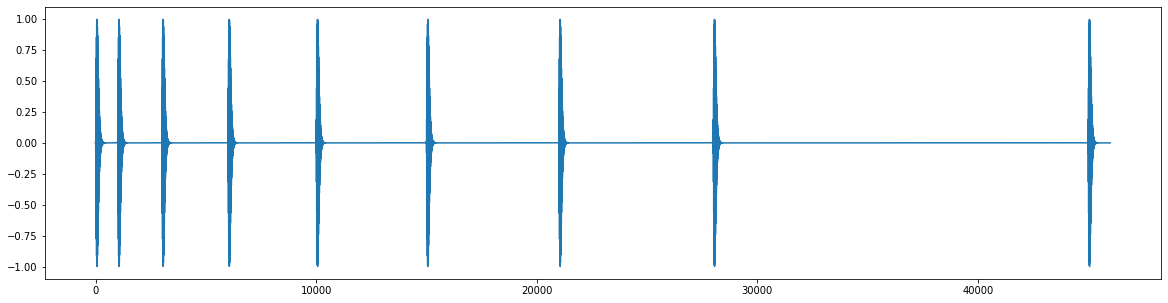

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(timespace, master_window)
plt.show()

In [ ]:
class loran_ref_signal_generator:
    
    
    def __init__():
        pass
    
    def master_window():
        pass
    
    def slave_1_window():
        pass
    
    def slave_2_window():
        pass
    
    def merge_signal_by_id():
        pass
    
    def auto_generator():
        pass